In [42]:
import os

import time

import shutil

import pathlib

import itertools

import glob

import cv2

import numpy as np

import pandas as pd

import seaborn as sns

sns.set_style('darkgrid')

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam, Adamax,SGD,RMSprop

from tensorflow.keras.metrics import categorical_crossentropy

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization

from tensorflow.keras import regularizers

from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2

from sklearn.metrics import classification_report, confusion_matrix

In [43]:
train = glob.glob("/kaggle/input/alzheimers-dataset/Alzheimer_s Dataset/train/**/*.jpg")

test = glob.glob("/kaggle/input/alzheimers-dataset/Alzheimer_s Dataset/test/**/*.jpg")

In [44]:
print("There is {} images in the training dataset".format(len(train)))

print("There is {} images in the test dataset".format(len(test)))

There is 5121 images in the training dataset
There is 1279 images in the test dataset


In [45]:
directory = "/kaggle/input/alzheimers-dataset/Alzheimer_s Dataset"



datasets, Mild_Demented, Moderate_Demented, Non_Demented, VeryMild_Demented  = ["train", "test"], [], [], [], []



for i in datasets:

    path = os.path.join(directory, i)

    MildDemented = glob.glob(os.path.join(path, "MildDemented/*.jpg"))

    ModerateDemented = glob.glob(os.path.join(path, "ModerateDemented/*.jpg"))

    NonDemented = glob.glob(os.path.join(path, "NonDemented/*.jpg"))

    VeryMildDemented = glob.glob(os.path.join(path, "VeryMildDemented/*.jpg"))

    Mild_Demented.extend(MildDemented), Moderate_Demented.extend(ModerateDemented), Non_Demented.extend(NonDemented), VeryMild_Demented.extend(VeryMildDemented)



print("The number of MildDemented images is: {}".format(len(Mild_Demented)))

print("The number of ModerateDemented images is: {}".format(len(Moderate_Demented)))

print("The number of NonDemented images is: {}".format(len(Non_Demented)))

print("The number of VeryMildDemented images is: {}".format(len(VeryMild_Demented)))

The number of MildDemented images is: 896
The number of ModerateDemented images is: 64
The number of NonDemented images is: 3200
The number of VeryMildDemented images is: 2240


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


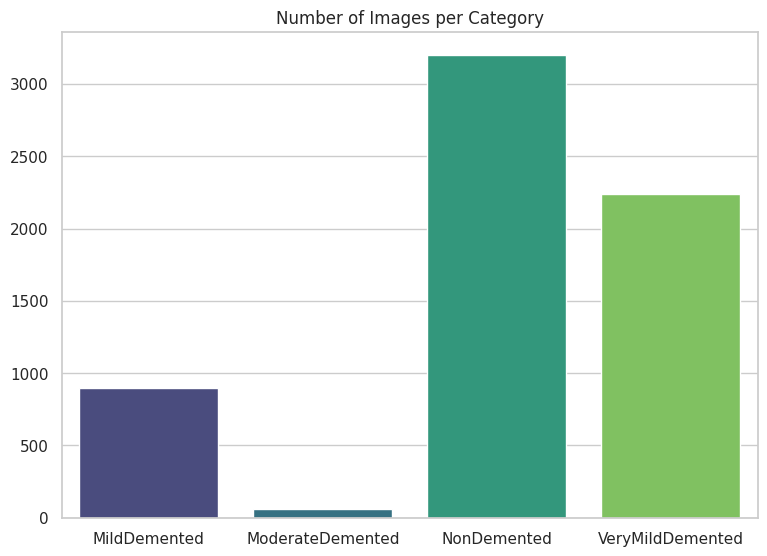

In [46]:
data = {

    'Category': ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'],

    'Count': [len(Mild_Demented), len(Moderate_Demented), len(Non_Demented), len(VeryMild_Demented)]

}



sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

ax = sns.barplot(x='Category', y='Count', data=data, palette='viridis')

ax.set_title('Number of Images per Category')

plt.show()

In [47]:
fftn = 224

fftm = 224


In [48]:

dataset_dir = '/kaggle/input/alzheimers-dataset/Alzheimer_s Dataset'

categories = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

image_paths = []

labels = []



In [49]:

for category in categories:

    for split in ['train', 'test']:

        category_dir = os.path.join(dataset_dir, split, category)

        for image_name in os.listdir(category_dir):

            image_path = os.path.join(category_dir, image_name)

            image_paths.append(image_path)

            labels.append(category)

In [50]:
data = pd.DataFrame({'image_path': image_paths, 'label': labels})

In [51]:
data

,image_path,label
0,/kaggle/input/alzheimers-dataset/Alzheimer_s D...,MildDemented
1,/kaggle/input/alzheimers-dataset/Alzheimer_s D...,MildDemented
2,/kaggle/input/alzheimers-dataset/Alzheimer_s D...,MildDemented
3,/kaggle/input/alzheimers-dataset/Alzheimer_s D...,MildDemented
4,/kaggle/input/alzheimers-dataset/Alzheimer_s D...,MildDemented
...,...,...
6395,/kaggle/input/alzheimers-dataset/Alzheimer_s D...,VeryMildDemented
6396,/kaggle/input/alzheimers-dataset/Alzheimer_s D...,VeryMildDemented
6397,/kaggle/input/alzheimers-dataset/Alzheimer_s D...,VeryMildDemented
6398,/kaggle/input/alzheimers-dataset/Alzheimer_s D...,VeryMildDemented


In [52]:
train_df, test_df = train_test_split(data, test_size=0.2, stratify=data['label'], random_state=98)


In [53]:

train_df.reset_index(drop=True, inplace=True)

test_df.reset_index(drop=True, inplace=True)

train_df.head()

,image_path,label
0,/kaggle/input/alzheimers-dataset/Alzheimer_s D...,NonDemented
1,/kaggle/input/alzheimers-dataset/Alzheimer_s D...,NonDemented
2,/kaggle/input/alzheimers-dataset/Alzheimer_s D...,NonDemented
3,/kaggle/input/alzheimers-dataset/Alzheimer_s D...,NonDemented
4,/kaggle/input/alzheimers-dataset/Alzheimer_s D...,NonDemented


In [54]:
test_df.head()

,image_path,label
0,/kaggle/input/alzheimers-dataset/Alzheimer_s D...,VeryMildDemented
1,/kaggle/input/alzheimers-dataset/Alzheimer_s D...,VeryMildDemented
2,/kaggle/input/alzheimers-dataset/Alzheimer_s D...,VeryMildDemented
3,/kaggle/input/alzheimers-dataset/Alzheimer_s D...,NonDemented
4,/kaggle/input/alzheimers-dataset/Alzheimer_s D...,NonDemented


In [55]:
len(train),len(test)

(5121, 1279)

In [56]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

In [57]:
batch_size =16

target_size = (224, 224)

In [58]:

train_generator = train_datagen.flow_from_dataframe(

    dataframe=train_df,

    x_col='image_path',

    y_col='label',

    class_mode='categorical',

    shuffle=True,

    batch_size=batch_size,

    target_size=target_size,

    subset='training'

)

Found 4096 validated image filenames belonging to 4 classes.


In [59]:

validation_generator = train_datagen.flow_from_dataframe(

    dataframe=train_df,

    x_col='image_path',

    y_col='label',

    class_mode='categorical',

    shuffle=True,

    batch_size=batch_size,

    target_size=target_size,

    subset='validation'

)


Found 1024 validated image filenames belonging to 4 classes.


In [60]:

test_generator = test_datagen.flow_from_dataframe(

    dataframe=test_df,

    x_col='image_path',

    y_col='label',

    shuffle=False,

    class_mode='categorical',

    batch_size=batch_size,

    target_size=target_size

)

Found 1280 validated image filenames belonging to 4 classes.


In [61]:
def show_images(gen):

    classes = list(gen.class_indices.keys())

    images, labels = next(gen)

    num_images = min(len(labels), 16)

    fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))

    for i, ax in enumerate(axes.flat):

        if i < num_images:

            ax.imshow(images[i])

            label_index = np.argmax(labels[i])

            ax.set_title(classes[label_index])

            ax.axis('off')

        else:

            ax.axis('off')




In [62]:
def plot_training(hist):

    tr_acc = hist.history['accuracy']

    tr_loss = hist.history['loss']

    val_acc = hist.history['val_accuracy']

    val_loss = hist.history['val_loss']

    index_loss = np.argmin(val_loss)

    val_lowest = val_loss[index_loss]

    index_acc = np.argmax(val_acc)

    acc_highest = val_acc[index_acc]



    plt.figure(figsize= (20, 8))

    plt.style.use('fivethirtyeight')

    Epochs = [i+1 for i in range(len(tr_acc))]

    loss_label = f'best epoch= {str(index_loss + 1)}'

    acc_label = f'best epoch= {str(index_acc + 1)}'

    plt.subplot(1, 2, 1)

    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')

    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')

    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)

    plt.title('Training and Validation Loss')

    plt.xlabel('Epochs')

    plt.ylabel('Loss')

    plt.tight_layout()

    plt.legend()

    plt.subplot(1, 2, 2)

    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')

    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')

    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)

    plt.title('Training and Validation Accuracy')

    plt.xlabel('Epochs')

    plt.ylabel('Accuracy')

    plt.legend()

    plt.tight_layout

    plt.show()

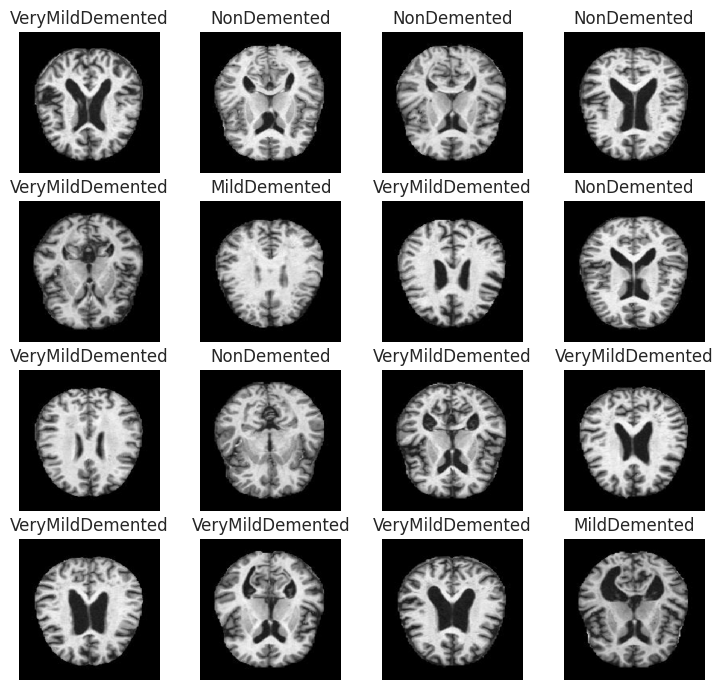

In [63]:
show_images(train_generator)

In [64]:
img_size = (224, 224)

channels = 3

img_shape = (img_size[0], img_size[1], channels)

class_count = len(list(train_generator.class_indices.keys()))

In [65]:

base_model = tf.keras.applications.InceptionV3(

    include_top=False,

    weights="imagenet",

    input_shape=img_shape,

    pooling='max'

)

In [66]:
model=Sequential()

model.add(base_model)

model.add(Dropout(0.2))

model.add(Flatten())

model.add(BatchNormalization())

model.add(Dense(4,activation='softmax'))


In [67]:

model.compile(SGD(learning_rate=0.005), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [68]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ ?                      │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_192         │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [69]:
history=model.fit(train_generator,

          validation_data=validation_generator,

    epochs=30,

    steps_per_epoch = 100)

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1731131891.416180     217 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_reduce_fusion_87', 108 bytes spill stores, 108 bytes spill loads



100/100 ━━━━━━━━━━━━━━━━━━━━ 60s 190ms/step - accuracy: 0.3332 - loss: 1.8436 - val_accuracy: 0.5000 - val_loss: 1.6590
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.4961 - loss: 1.4318 - val_accuracy: 0.5469 - val_loss: 1.3900
Epoch 3/30
 56/100 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.5908 - loss: 1.1337

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.5970 - loss: 1.1233 - val_accuracy: 0.5137 - val_loss: 1.2255
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - accuracy: 0.6512 - loss: 0.9452 - val_accuracy: 0.5498 - val_loss: 1.8860
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - accuracy: 0.7011 - loss: 0.8004 - val_accuracy: 0.6816 - val_loss: 0.8494
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.8107 - loss: 0.5620 - val_accuracy: 0.6758 - val_loss: 0.9556
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - accuracy: 0.8023 - loss: 0.5495 - val_accuracy: 0.7158 - val_loss: 0.9728
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - accuracy: 0.8741 - loss: 0.3639 - val_accuracy: 0.7920 - val_loss: 0.6244
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.8943 - loss: 0.2868 - val_accuracy: 0.6016 - val_loss: 2.0145
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - accuracy: 0.9084 - loss: 0.2436 - val_accu

In [70]:
model.evaluate(test_generator)

80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9277 - loss: 0.2383


[0.20573997497558594, 0.9359375238418579]

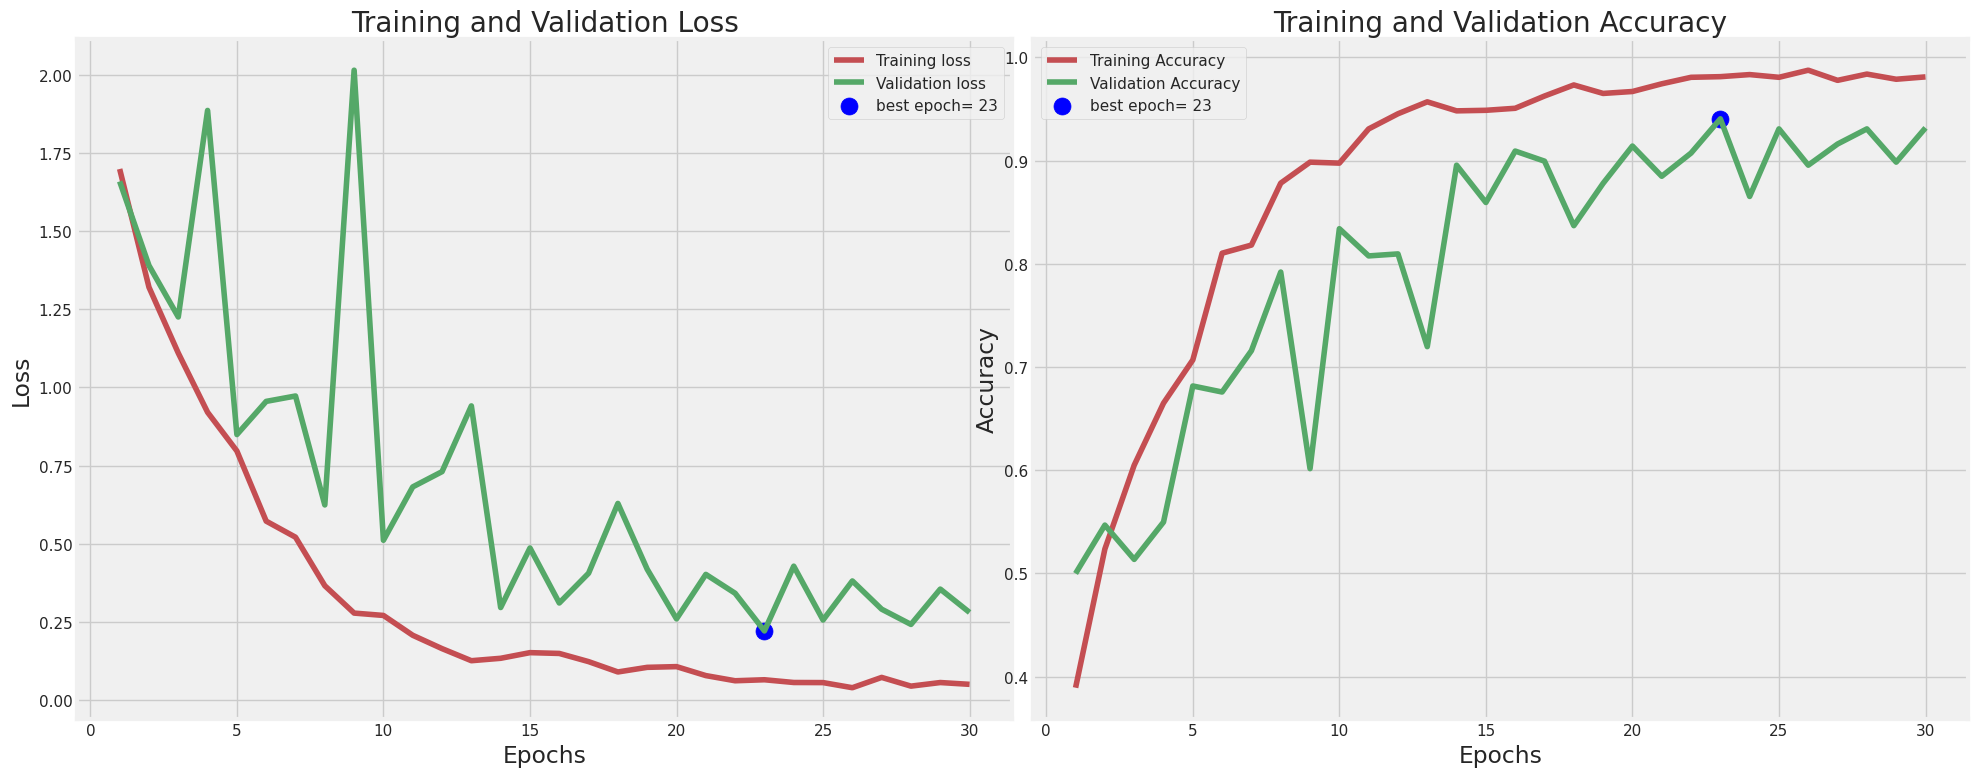

In [71]:
plot_training(history)

In [72]:
history_dict = history.history

history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [73]:
print(history.history['accuracy'])

print(history.history['val_accuracy'])


[0.3893750011920929, 0.5237500071525574, 0.6049107313156128, 0.6650000214576721, 0.7068750262260437, 0.8102678656578064, 0.8181250095367432, 0.878125011920929, 0.8984375, 0.8974999785423279, 0.9306250214576721, 0.9453125, 0.9568750262260437, 0.9481250047683716, 0.9486607313156128, 0.9506250023841858, 0.9624999761581421, 0.9732142686843872, 0.9649999737739563, 0.9668750166893005, 0.9743303656578064, 0.9806249737739563, 0.981249988079071, 0.9832589030265808, 0.9806249737739563, 0.987500011920929, 0.9776785969734192, 0.9837499856948853, 0.9787499904632568, 0.9810267686843872]
[0.5, 0.546875, 0.513671875, 0.5498046875, 0.681640625, 0.67578125, 0.7158203125, 0.7919921875, 0.6015625, 0.833984375, 0.8076171875, 0.8095703125, 0.7197265625, 0.8955078125, 0.859375, 0.9091796875, 0.8994140625, 0.8369140625, 0.8779296875, 0.9140625, 0.884765625, 0.9072265625, 0.9404296875, 0.865234375, 0.9306640625, 0.8955078125, 0.916015625, 0.9306640625, 0.8984375, 0.931640625]


In [74]:
def create_transfer_model(base_model, input_shape, num_classes=4):
    base_model.trainable = False 
    model = Sequential([
        base_model,
        Dropout(0.2),
        Flatten(),
        BatchNormalization(),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=SGD(learning_rate=0.005), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [75]:
base_models = {
    'VGG16': VGG16(weights="imagenet", include_top=False, input_shape=img_shape, pooling='max'),
    'ResNet50': ResNet50(weights="imagenet", include_top=False, input_shape=img_shape, pooling='max'),
    'MobileNetV2': MobileNetV2(weights="imagenet", include_top=False, input_shape=img_shape, pooling='max')
}

In [76]:
model_histories = {}

for name, base_model in base_models.items():
    print(f"\nTraining {name} model...")
    model = create_transfer_model(base_model, img_shape, class_count)
    
    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=30,
        steps_per_epoch=100
    )
    
    model_histories[name] = history
    
    print(f"\nEvaluating {name} model on test set...")
    test_loss, test_accuracy = model.evaluate(test_generator)
    print(f"{name} Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
    
    test_generator.reset()
    y_true = test_generator.classes
    y_pred = model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    print(f"\nClassification Report for {name}:\n", classification_report(y_true, y_pred_classes, target_names=categories))
    print(f"Confusion Matrix for {name}:\n", confusion_matrix(y_true, y_pred_classes))


Training VGG16 model...
Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 110ms/step - accuracy: 0.2978 - loss: 1.7123 - val_accuracy: 0.1650 - val_loss: 1.4905
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - accuracy: 0.3391 - loss: 1.5433 - val_accuracy: 0.5098 - val_loss: 1.1553
Epoch 3/30
 56/100 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.4419 - loss: 1.3441

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.4390 - loss: 1.3401 - val_accuracy: 0.5410 - val_loss: 1.0780
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - accuracy: 0.4674 - loss: 1.2437 - val_accuracy: 0.5547 - val_loss: 1.0088
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.4895 - loss: 1.1970 - val_accuracy: 0.5713 - val_loss: 0.9651
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.5130 - loss: 1.1830 - val_accuracy: 0.5811 - val_loss: 0.9573
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.5234 - loss: 1.1038 - val_accuracy: 0.5859 - val_loss: 0.9317
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.5202 - loss: 1.0856 - val_accuracy: 0.6143 - val_loss: 0.9038
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.5638 - loss: 1.0314 - val_accuracy: 0.6201 - val_loss: 0.8939
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.5608 - loss: 1.0271 - val_accu

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - accuracy: 0.3022 - loss: 1.4895 - val_accuracy: 0.4941 - val_loss: 1.2194
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.4311 - loss: 1.2790 - val_accuracy: 0.5381 - val_loss: 1.0937
Epoch 3/30
 55/100 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5382 - loss: 1.1111

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.5346 - loss: 1.1220 - val_accuracy: 0.5312 - val_loss: 1.0595
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 72ms/step - accuracy: 0.5266 - loss: 1.0823 - val_accuracy: 0.5479 - val_loss: 1.0085
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.5028 - loss: 1.1082 - val_accuracy: 0.5654 - val_loss: 0.9717
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.5709 - loss: 1.0322 - val_accuracy: 0.5791 - val_loss: 0.9533
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.5473 - loss: 1.0120 - val_accuracy: 0.5830 - val_loss: 0.9397
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.5552 - loss: 0.9854 - val_accuracy: 0.5801 - val_loss: 0.9299
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.5598 - loss: 0.9705 - val_accuracy: 0.5908 - val_loss: 0.9168
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.6041 - loss: 0.9164 - val_accuracy: 0.5

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.4559 - loss: 1.2589 - val_accuracy: 0.5732 - val_loss: 1.0390
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.5203 - loss: 1.1758 - val_accuracy: 0.6016 - val_loss: 0.9746
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.5595 - loss: 1.0994 - val_accuracy: 0.6201 - val_loss: 0.9323
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5784 - loss: 1.0404 - val_accuracy: 0.6172 - val_loss: 0.9120
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.5829 - loss: 1.0246 - val_accuracy: 0.6240 - val_loss: 0.8804
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.5861 - loss: 1.0009 - val_accuracy: 0.6396 - val_loss: 0.8568
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6151 - loss: 0.9018 - val_accuracy: 0.6406 - val_loss: 0.8427
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.6316 - loss: 0.8846 - val_accuracy: 0.65


Plotting metrics for VGG16 model...


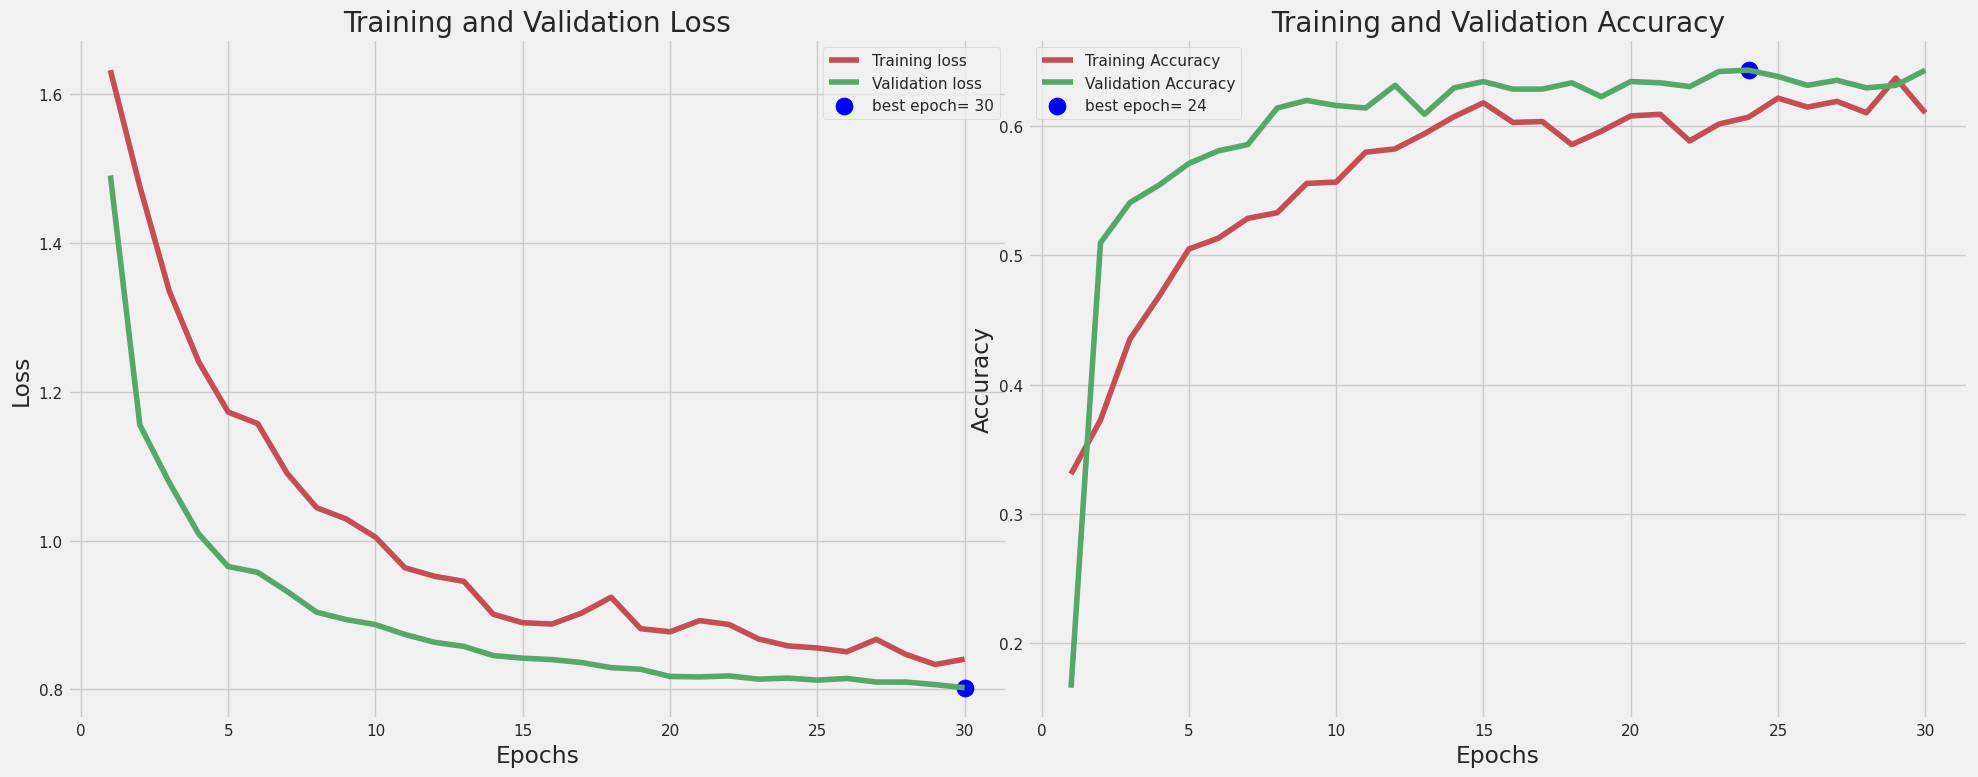


Plotting metrics for ResNet50 model...


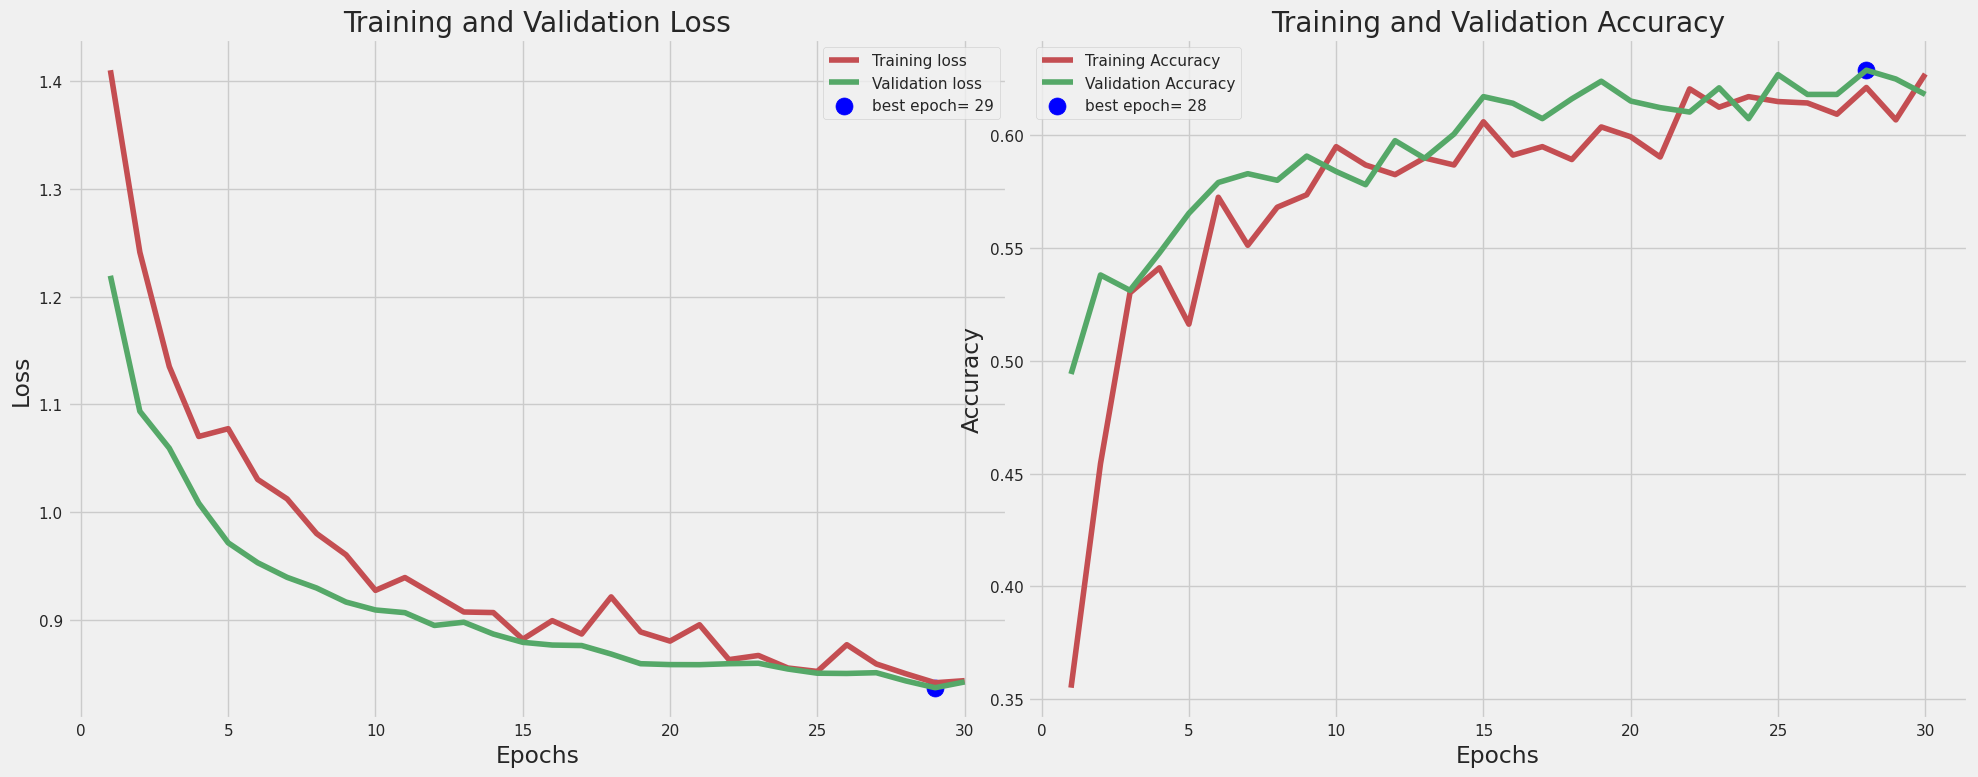


Plotting metrics for MobileNetV2 model...


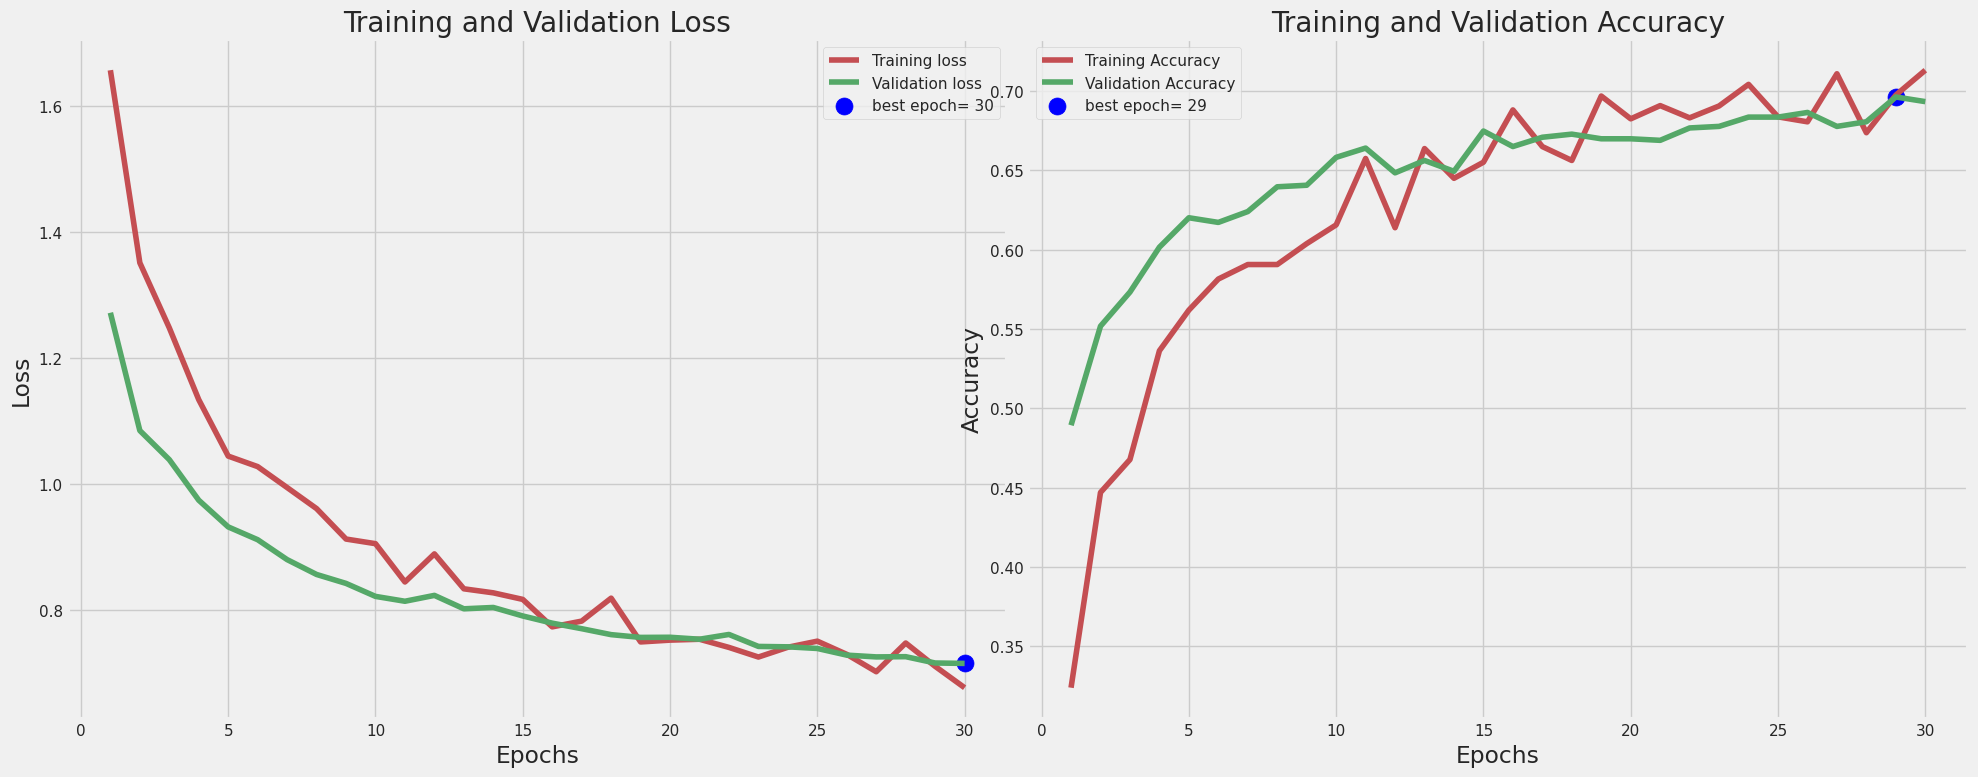

In [77]:
for name, hist in model_histories.items():
    print(f"\nPlotting metrics for {name} model...")
    plot_training(hist)

In [ ]:
class_indices = train_generator.class_indices
class_labels = list(class_indices.keys())

In [78]:
# Save the model to an H5 file
model.save('model.h5')  

In [1]:
from tensorflow.keras.models import load_model

loaded_model = load_model('model.h5') 

In [2]:
from tensorflow.keras.preprocessing import image

def preprocess_image(image_path, target_size=(224, 224)):
    img = image.load_img(image_path, target_size=target_size)
    
    img_array = image.img_to_array(img)
    
    img_array = np.expand_dims(img_array, axis=0)
    
    img_array /= 255.0
    
    return img_array



In [10]:

class_labels=['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
import numpy as np
def predict_image(image_path, model, class_labels):
    
    img_array = preprocess_image(image_path)
    
    predictions = model.predict(img_array)
    
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_labels[predicted_class_index]
    
    print(f"Predicted Class: {predicted_class}")
    
    for i, label in enumerate(class_labels):
        print(f"{label}: {predictions[0][i]:.2f}")


In [12]:
image_path = r"C:\Users\datma003\Desktop\projects1\New\Alzheimer Disease Detection\Alzheimer_s Dataset\train\MildDemented\mildDem3.jpg"
predict_image(image_path, loaded_model, class_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Class: MildDemented
MildDemented: 0.74
ModerateDemented: 0.01
NonDemented: 0.02
VeryMildDemented: 0.23
